# Taxi Ride Anomalies
This notebook details some basic code to get a simple clustering anomaly detection algorithm up and running. The focus here is not an optimised algorithm, but to create a simple base model from which we can explore the concepts of machine learning engineering in the rest of the book.

## The Data
First, we will read in simulated taxi ride data for processing. We assume that the typical Exploratory Data Analysis (EDA) and modelling work have been carried out in detail by the data scientists in your team.

In [6]:
import os
# If data present, read it in
file_path = '../data/taxi-rides.csv'
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    ride_lengths = np.random
    


In [7]:
import numpy as np

In [8]:
ride_dists = np.random.randint(low=1, high=10, size=400)
ride_speeds = np.random.randint(low=20, high=50, size=400)
ride_times = ride_dists/ride_speeds

ride_price_per_mile = np.random.normal(loc = 3.80, scale=0.5, size=400)
ride_charges = ride_dists*ride_price_per_mile

In [9]:
import pandas as pd

df = pd.DataFrame(
    {
        'ride_dists': ride_dists, 
        'ride_times': ride_times,   
        'ride_charges': ride_charges
    }
)

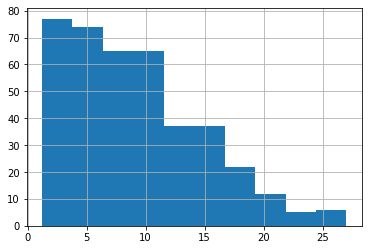

In [10]:
(df['ride_times']*60).hist()

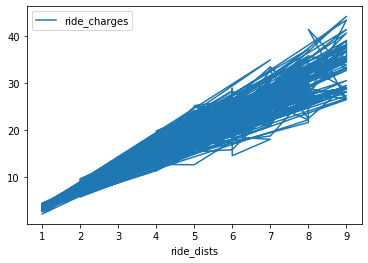

In [11]:
df.plot(x='ride_dists', y='ride_charges', kind='scatter')

Automatically created module for IPython interactive environment


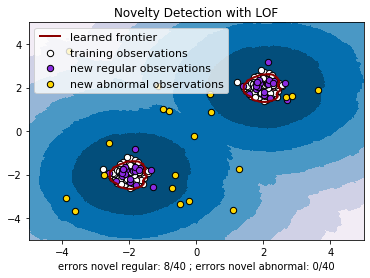

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

np.random.seed(42)

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# Generate normal (not abnormal) training observations
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate new normal (not abnormal) observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model for novelty detection (novelty=True)
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)
# DO NOT use predict, decision_function and score_samples on X_train as this
# would give wrong results but only on new unseen data (not used in X_train),
# e.g. X_test, X_outliers or the meshgrid
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the learned frontier, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection with LOF")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_test, n_error_outliers))
plt.show()